<a href="https://colab.research.google.com/github/Mariyyah-Alrasheed/6_Week/blob/main/Copy_of_Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [2]:
!pip install pmdarima

In [3]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
traffic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from pmdarima import auto_arima

import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import pandas as pd

In [5]:
df = pd.read_csv('/content/Traffic Data.csv')

In [6]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [8]:
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.set_index('date_time')
df = df.sort_index()

In [9]:
df.head(-1)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.00,0.0,90,Snow,heavy snow
2016-11-18 15:00:00,4872.0,274.08,0.00,0.0,90,Fog,fog
2016-11-18 15:00:00,4872.0,274.08,0.00,0.0,90,Mist,mist
2016-11-18 16:00:00,5074.0,273.84,0.00,0.0,90,Fog,fog
2016-11-18 16:00:00,5074.0,273.84,0.00,0.0,90,Mist,mist
...,...,...,...,...,...,...,...
2018-09-30 18:00:00,3947.0,284.20,0.25,0.0,75,Rain,light rain
2018-09-30 19:00:00,3543.0,283.45,0.00,0.0,75,Clouds,broken clouds
2018-09-30 20:00:00,2781.0,282.76,0.00,0.0,90,Clouds,overcast clouds


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [11]:
# df_2.index = df.index.drop_duplicates()

In [12]:
# df_1= df.index.drop_duplicates(keep='first')

In [13]:
# df_1

In [14]:
df.corr(numeric_only=True)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
traffic_volume,1.000000,0.132268,0.012803,NaN,0.094228
temp,0.132268,1.000000,0.100254,NaN,-0.032767
rain_1h,0.012803,0.100254,1.000000,NaN,0.074927
snow_1h,NaN,NaN,NaN,NaN,NaN
clouds_all,0.094228,-0.032767,0.074927,NaN,1.000000


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

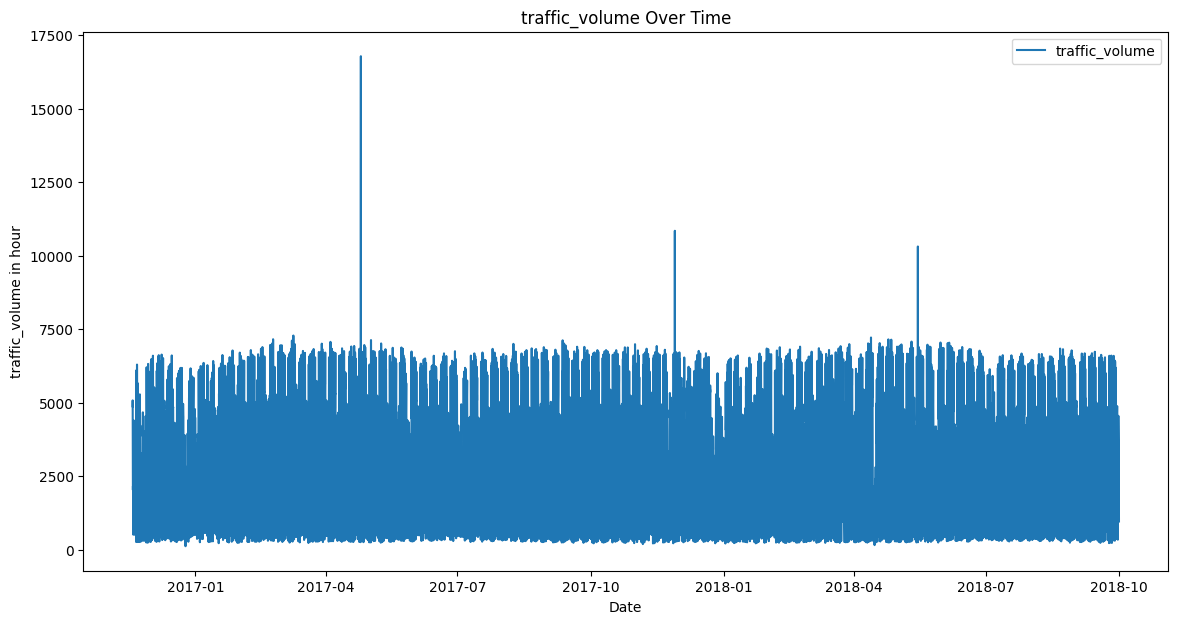

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(df['traffic_volume'], label='traffic_volume')
plt.title('traffic_volume Over Time')
plt.xlabel('Date')
plt.ylabel('traffic_volume in hour')
plt.legend()
plt.show()

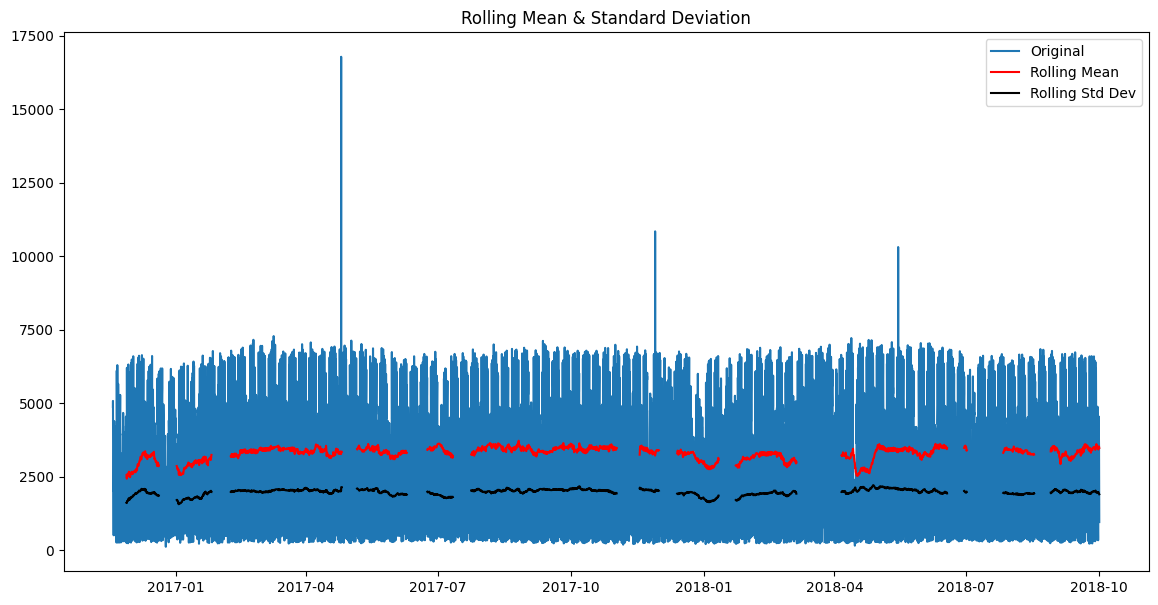

In [16]:
# Calculate rolling statistics
rolling_mean = df['traffic_volume'].rolling(window=365).mean()
rolling_std = df['traffic_volume'].rolling(window=365).std()

# Plot rolling statistics
plt.figure(figsize=(14, 7))
plt.plot(df['traffic_volume'], label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std Dev')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()


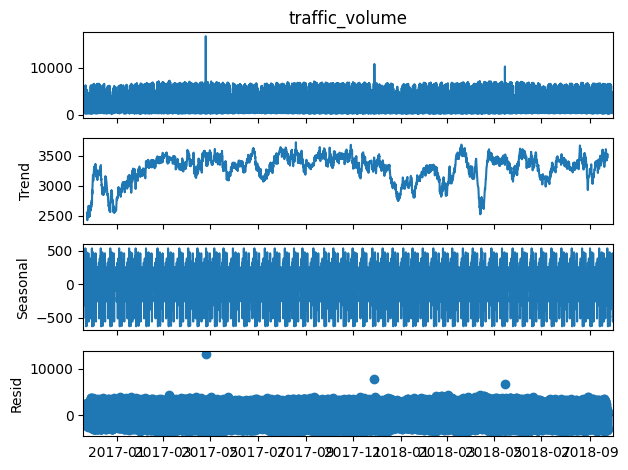

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['traffic_volume'].dropna(), model='additive', period=365)

# Plot the components
result.plot()
plt.show()


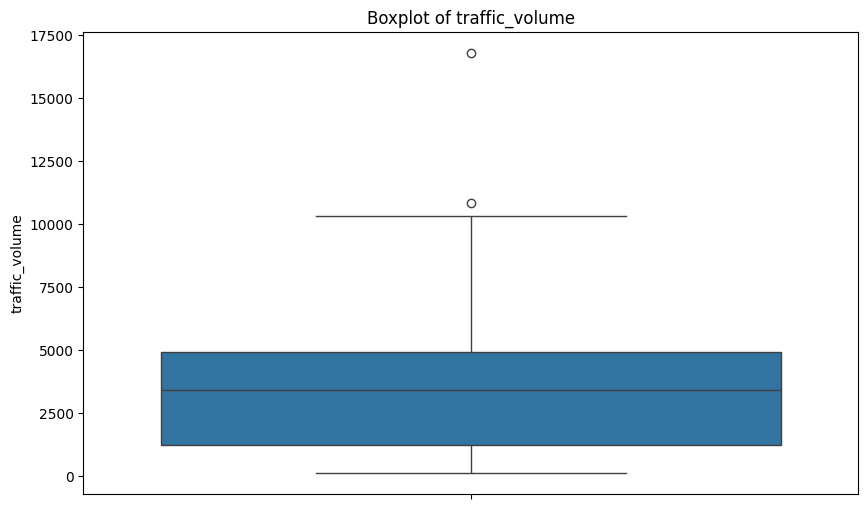

In [18]:
import seaborn as sns

# Boxplot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df['traffic_volume'])
plt.title('Boxplot of traffic_volume')
plt.show()

# # Scatter plot to detect anomalies
# plt.figure(figsize=(14, 7))
# sns.scatterplot(x=df.index, y='traffic_volume', data=df)
# plt.title('Scatter Plot of traffic_volume')
# plt.xlabel('Date')
# plt.ylabel('traffic_volume')
# plt.show()


## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [19]:
df = df.interpolate('linear')

In [20]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [21]:
# df.set_index('date_time',inplace=True)

KeyError: "None of ['date_time'] are in the columns"

In [ ]:
# a =df.resample('D')

In [ ]:
# def resampl(col)
# for _,i in df['']:
# df['week_starting'] = pd.date_range('2016-11-18',
#                                     periods=8,
#                                     freq='W')

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [ ]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)

In [ ]:
df['diff_traffic_volume'] = df['traffic_volume'].diff()

In [ ]:
start ='2016-11-18'
end = '2018-09-30'
s = pd.date_range(start, end, freq='D').to_series()

In [ ]:
df['Day_of_the_week'] = df.index.dayofweek

In [ ]:
df['Month'] = df.index.month

In [ ]:
df['Day_of_the_year'] = df.index.day_of_year

In [ ]:
df['Day_of_the_year']

In [ ]:
df

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace=True)

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [22]:
df_sampel = df[['traffic_volume']]

In [ ]:
df_sampel

In [23]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [ ]:
# label_enco = LabelEncoder()

# for col in df_sampel.columns:
#     df_sampel[col] = label_enco.fit_transform(df_sampel[col])

In [24]:
train_size = int(len(df_sampel)*0.80)

train = df_sampel[:train_size]
test = df_sampel[train_size:]

In [ ]:
# data_train = train.drop(columns=['traffic_volume'])
# y_train = train['traffic_volume']

In [ ]:
# data_test = test.drop(columns=['traffic_volume'])
# y_test = test['traffic_volume']

In [ ]:
# data_test

In [ ]:
# data_train

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [25]:
scaler = MinMaxScaler()
scaler_test = MinMaxScaler()
data_train_scaler = scaler.fit_transform(train)
scaler_test_scaled = scaler_test.fit_transform(test)

In [ ]:
# target_scaler = MinMaxScaler()

# y_scaler = target_scaler.fit_transform(y_train.reshape(-1, 1))

In [ ]:
df_scaler

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [ ]:
from pmdarima.arima

In [30]:
stepwise = auto_arima(train['traffic_volume'], start_p = 0, start_q = 0,
                          max_p = 1, max_q = 1, m = 36,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

Performing stepwise search to minimize aic


KeyboardInterrupt: 

In [ ]:
stepwise.summary()

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [27]:
model = SARIMAX(train['traffic_volume'],
                order=(1, 0, 0),
                seasonal_order=(1, 1, 1, 7)
                )

In [71]:
result = model.fit()

In [72]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                      traffic_volume   No. Observations:                16000
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 7)   Log Likelihood             -128649.700
Date:                             Sun, 25 Aug 2024   AIC                         257307.401
Time:                                     08:55:40   BIC                         257338.120
Sample:                                          0   HQIC                        257317.561
                                           - 16000                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9274      0.003    317.514      0.000       0.922       0.933
ar.S.L7       -0.1408      0.007    -18.898      0.000      -0.155      -0.126
ma.S.L7       -1.0000      0.005   -205.584      0.000      -1.010      -0.990
sigma2      5.662e+05    8.6e-09   6.58e+13      0.000    5.66e+05    5.66e+05
===================================================================================
Ljung-Box (L1) (Q):                3060.40   Jarque-Bera (JB):            114945.11
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             1.17
Prob(H) (two-sided):                  0.08   Kurtosis:                        15.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.47e+27. Standard errors may be unstable.
"""

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [79]:
predictions1 = result.predict(X_test)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [81]:
mean_squared_error(test, predictions1)

NameError: name 'predictions1' is not defined

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,Dropout
import numpy as np

In [32]:
def create_seq(data,len_saq):
  X=[]
  y=[]

  for i in range(len(data)-len_saq):
    X.append(data[i:i+len_saq])
    y.append(data[i+len_saq])
  return np.array(X), np.array(y)

In [33]:
train_RNN = train['traffic_volume']
test_RNN = test['traffic_volume']

In [61]:
saq_len = 10
X_train , y_train = create_seq(data_train_scaler,saq_len)
X_test , y_test = create_seq(scaler_test_scaled,saq_len)

In [46]:
X_train.shape

(15990, 10, 1)

In [48]:
X_test.shape

(15990, 10, 1)

In [50]:
RNN_model = Sequential([
    SimpleRNN(50,return_sequences=True,input_shape=(saq_len,1)),
    Dense(1)
])

RNN_model.compile(optimizer='adam',loss='mse')

In [51]:
RNN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 10, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10, 1)               │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [55]:
early_stop = EarlyStopping(monitor='val_loss', patience=15 , restore_best_weights=True)

history_1 = RNN_model.fit(X_train,y_train,
                        epochs=10,
                        callbacks = [ early_stop],
                        validation_data=(X_test,y_test),
                        batch_size=32)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0139 - val_loss: 0.0112
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0111 - val_loss: 0.0107
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0107 - val_loss: 0.0104
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0102 - val_loss: 0.0101
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0090 - val_loss: 0.0096
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0088 - val_loss: 0.0087


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [57]:
X_test.shape

(15990, 10, 1)

In [69]:
y_pred = RNN_model.predict(scaler_test_scaled)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Exception ignored in: <function _xla_gc_callback at 0x7871a78011b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


In [70]:
y_pred

array([[[0.18826541]],

       [[0.19098043]],

       [[0.19287272]],

       ...,

       [[0.17838524]],

       [[0.18202242]],

       [[0.18708195]]], dtype=float32)

In [63]:
y_pred = y_pred.flatten()

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [77]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

mse = mean_squared_error(y_test, y_pred)
print(f'MAE: {mse}')

ValueError: Found input variables with inconsistent numbers of samples: [3990, 4000]

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1- i used interpoly

2- we create a day of week & a day of years

3- i put it a smalll becuase the crush

4- becouase the time

5-  MAE

6- i have cruched

7-